In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [87]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Datafile1.csv",engine='python')

In [88]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [89]:
df.shape

(209593, 37)

In [90]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [92]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [93]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [94]:
df.drop(['msisdn'], axis = 1,inplace=True)

In [95]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [96]:
df.drop(['pdate'], axis = 1,inplace=True)

In [97]:
df.drop(['pcircle'], axis = 1,inplace=True)

In [98]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [99]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

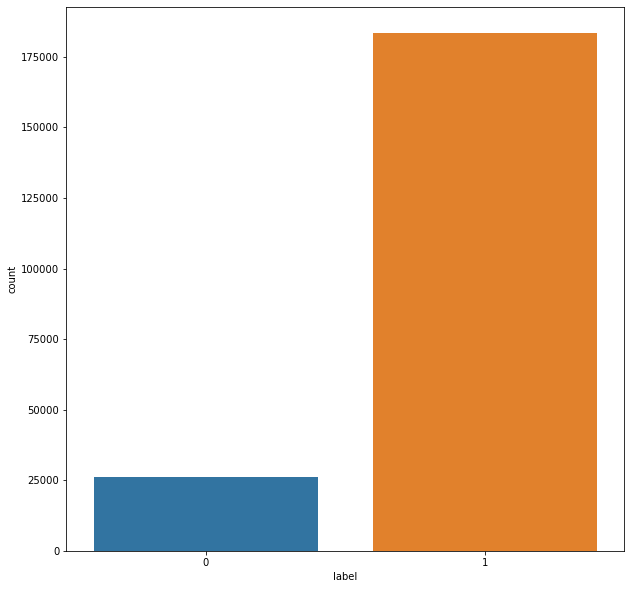

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(x="label", data=df)
plt.show()

In [101]:
countofdefaulter = len(df[df.label == 0])
countofnotdefaulter = len(df[df.label == 1])
print("Percentage of non defaulter: {:.2f}%".format((countofdefaulter / (len(df.label))*100)))
print("Percentage of defaulter: {:.2f}%".format((countofnotdefaulter / (len(df.label))*100)))

Percentage of non defaulter: 12.48%
Percentage of defaulter: 87.52%


In [102]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [103]:
df.shape

(209593, 33)

In [104]:
# scaling part

<AxesSubplot:ylabel='Density'>

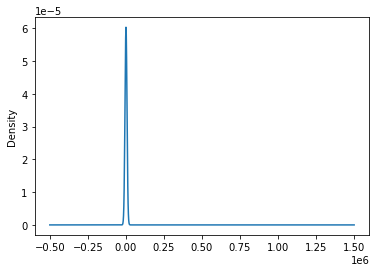

In [105]:
df.aon.plot(kind='density')

In [106]:
#Target Variable (Label)
df_label = df.iloc[:,0]

In [107]:
#Dropping the target variable from dataframe
df.drop("label",axis=1,inplace=True)


In [108]:
headnames=[str(i) for i in df.columns]

In [109]:
from sklearn.preprocessing import Normalizer
scaller=Normalizer()
df = scaller.fit_transform(df)

In [110]:
type(df)

numpy.ndarray

In [111]:
df=pd.DataFrame(df,columns=headnames[0:])

In [112]:
df.shape

(209593, 32)

In [113]:
df.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0  0.040558      0.455545      0.457051  0.032824  0.038789   
1  0.032192      0.548083      0.548207  0.166896  0.166896   
2  0.127283      0.332602      0.332602  0.214152  0.214152   
3  0.143966      0.012681      0.012681  0.095233  0.095233   
4  0.030319      0.004822      0.004822  0.035182  0.035182   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           0.000298                0.0          0.229483       0.000298   
1           0.000904                0.0          0.261653       0.000045   
2           0.000714                0.0          0.366148       0.000238   
3           0.024492                0.0          0.565709       0.000000   
4           0.000128                0.0          0.073925       0.000224   

   fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0      0.003131  ...     0.000298      0.001789         0.000895   
1      0.000000  ...     0.000045      0.000543         0.000543   
2      0.000000  ...     0.000238      0.001427         0.001427   
3      0.000000  ...     0.001195      0.007168         0.003584   
4      0.000064  ...     0.000224      0.001345         0.000192   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0     0.000298      0.001789         0.000895   
1                 0.0     0.000045      0.000543         0.000543   
2                 0.0     0.000238      0.001427         0.001427   
3                 0.0     0.001195      0.007168         0.003584   
4                 0.0     0.000224      0.001345         0.000192   

   medianamnt_loans90  payback30  payback90  
0                 0.0   0.004324   0.004324  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   0.000075   0.000075  

[5 rows x 32 columns]

In [114]:
#Concatinating both NUMERIC and CATEGORICAL variables
df = pd.concat([df,df_label], axis=1)
df.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0  0.040558      0.455545      0.457051  0.032824  0.038789   
1  0.032192      0.548083      0.548207  0.166896  0.166896   
2  0.127283      0.332602      0.332602  0.214152  0.214152   
3  0.143966      0.012681      0.012681  0.095233  0.095233   
4  0.030319      0.004822      0.004822  0.035182  0.035182   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           0.000298                0.0          0.229483       0.000298   
1           0.000904                0.0          0.261653       0.000045   
2           0.000714                0.0          0.366148       0.000238   
3           0.024492                0.0          0.565709       0.000000   
4           0.000128                0.0          0.073925       0.000224   

   fr_ma_rech30  ...  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0      0.003131  ...      0.001789         0.000895                 0.0   
1      0.000000  ...      0.000543         0.000543                 0.0   
2      0.000000  ...      0.001427         0.001427                 0.0   
3      0.000000  ...      0.007168         0.003584                 0.0   
4      0.000064  ...      0.001345         0.000192                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0     0.000298      0.001789         0.000895                 0.0   0.004324   
1     0.000045      0.000543         0.000543                 0.0   0.000000   
2     0.000238      0.001427         0.001427                 0.0   0.000000   
3     0.001195      0.007168         0.003584                 0.0   0.000000   
4     0.000224      0.001345         0.000192                 0.0   0.000075   

   payback90  label  
0   0.004324      0  
1   0.000000      1  
2   0.000000      1  
3   0.000000      1  
4   0.000075      1  

[5 rows x 33 columns]

In [115]:
#FEATURE SELECTION

In [116]:
#Defining the Target and FEATURE Variable
x = df.drop(labels=['label'],axis=1)
y = df.iloc[:,-1]

In [117]:
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0       0.040558      0.455545      0.457051  0.032824  0.038789   
1       0.032192      0.548083      0.548207  0.166896  0.166896   
2       0.127283      0.332602      0.332602  0.214152  0.214152   
3       0.143966      0.012681      0.012681  0.095233  0.095233   
4       0.030319      0.004822      0.004822  0.035182  0.035182   
...          ...           ...           ...       ...       ...   
209588  0.025266      0.009498      0.009498  0.068118  0.068118   
209589  0.182149      0.006258      0.006258  0.292856  0.292856   
209590  0.035028      0.409517      0.411634  0.202693  0.307513   
209591  0.061433      0.442953      0.446008  0.014607  0.034923   
209592  0.068327      0.194021      0.195985  0.020914  0.027279   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                0.000298           0.000000          0.229483       0.000298   
1                0.000904           0.000000          0.261653       0.000045   
2                0.000714           0.000000          0.366148       0.000238   
3                0.024492           0.000000          0.565709       0.000000   
4                0.000128           0.000000          0.073925       0.000224   
...                   ...                ...               ...            ...   
209588           0.000063           0.000000          0.253163       0.000188   
209589           0.000678           0.000000          0.130978       0.000678   
209590           0.000104           0.000000          0.053216       0.000173   
209591           0.000071           0.001348          0.027418       0.000177   
209592           0.000562           0.000000          0.325258       0.000086   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0           0.003131  ...     0.000298      0.001789         0.000895   
1           0.000000  ...     0.000045      0.000543         0.000543   
2           0.000000  ...     0.000238      0.001427         0.001427   
3           0.000000  ...     0.001195      0.007168         0.003584   
4           0.000064  ...     0.000224      0.001345         0.000192   
...              ...  ...          ...           ...              ...   
209588      0.000125  ...     0.000125      0.000750         0.000375   
209589      0.000169  ...     0.000508      0.003050         0.001017   
209590      0.000277  ...     0.000138      0.001452         0.000415   
209591      0.000142  ...     0.000071      0.000638         0.000426   
209592      0.000043  ...     0.000086      0.000778         0.000519   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0     0.000298      0.001789         0.000895   
1                      0.0     0.000045      0.000543         0.000543   
2                      0.0     0.000238      0.001427         0.001427   
3                      0.0     0.001195      0.007168         0.003584   
4                      0.0     0.000224      0.001345         0.000192   
...                    ...          ...           ...              ...   
209588                 0.0     0.000125      0.000750         0.000375   
209589                 0.0     0.000508      0.003050         0.001017   
209590                 0.0     0.000207      0.001867         0.000415   
209591                 0.0     0.000106      0.000851         0.000426   
209592                 0.0     0.000086      0.000778         0.000519   

        medianamnt_loans90  payback30  payback90  
0                      0.0   0.004324   0.004324  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   0.000075   0.000075  
...                    ...        ...        ...  
209588                 0.0   0.000063   0.000063  
209589                 0.0   0.000169   0.000169 

In [118]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [119]:
from scipy import stats
x[(np.abs(stats.zscore(x))<3).all(axis=1)]

aon  daily_decr30  daily_decr90  rental30  rental90  \
0       0.040558      0.455545      0.457051  0.032824  0.038789   
1       0.032192      0.548083      0.548207  0.166896  0.166896   
2       0.127283      0.332602      0.332602  0.214152  0.214152   
4       0.030319      0.004822      0.004822  0.035182  0.035182   
5       0.040807      0.162178      0.162472  0.026448  0.027310   
...          ...           ...           ...       ...       ...   
209588  0.025266      0.009498      0.009498  0.068118  0.068118   
209589  0.182149      0.006258      0.006258  0.292856  0.292856   
209590  0.035028      0.409517      0.411634  0.202693  0.307513   
209591  0.061433      0.442953      0.446008  0.014607  0.034923   
209592  0.068327      0.194021      0.195985  0.020914  0.027279   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                0.000298           0.000000          0.229483       0.000298   
1                0.000904           0.000000          0.261653       0.000045   
2                0.000714           0.000000          0.366148       0.000238   
4                0.000128           0.000000          0.073925       0.000224   
5                0.000144           0.000000          0.110568       0.000287   
...                   ...                ...               ...            ...   
209588           0.000063           0.000000          0.253163       0.000188   
209589           0.000678           0.000000          0.130978       0.000678   
209590           0.000104           0.000000          0.053216       0.000173   
209591           0.000071           0.001348          0.027418       0.000177   
209592           0.000562           0.000000          0.325258       0.000086   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0           0.003131  ...     0.000298      0.001789         0.000895   
1           0.000000  ...     0.000045      0.000543         0.000543   
2           0.000000  ...     0.000238      0.001427         0.001427   
4           0.000064  ...     0.000224      0.001345         0.000192   
5           0.000718  ...     0.000216      0.001293         0.000431   
...              ...  ...          ...           ...              ...   
209588      0.000125  ...     0.000125      0.000750         0.000375   
209589      0.000169  ...     0.000508      0.003050         0.001017   
209590      0.000277  ...     0.000138      0.001452         0.000415   
209591      0.000142  ...     0.000071      0.000638         0.000426   
209592      0.000043  ...     0.000086      0.000778         0.000519   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0     0.000298      0.001789         0.000895   
1                      0.0     0.000045      0.000543         0.000543   
2                      0.0     0.000238      0.001427         0.001427   
4                      0.0     0.000224      0.001345         0.000192   
5                      0.0     0.000216      0.001293         0.000431   
...                    ...          ...           ...              ...   
209588                 0.0     0.000125      0.000750         0.000375   
209589                 0.0     0.000508      0.003050         0.001017   
209590                 0.0     0.000207      0.001867         0.000415   
209591                 0.0     0.000106      0.000851         0.000426   
209592                 0.0     0.000086      0.000778         0.000519   

        medianamnt_loans90  payback30  payback90  
0                      0.0   0.004324   0.004324  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
4                      0.0   0.000075   0.000075  
5                      0.0   0.000790   0.000599  
...                    ...        ...        ...  
209588                 0.0   0.000063   0.000063  
209589                 0.0   0.000169   0.000169 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

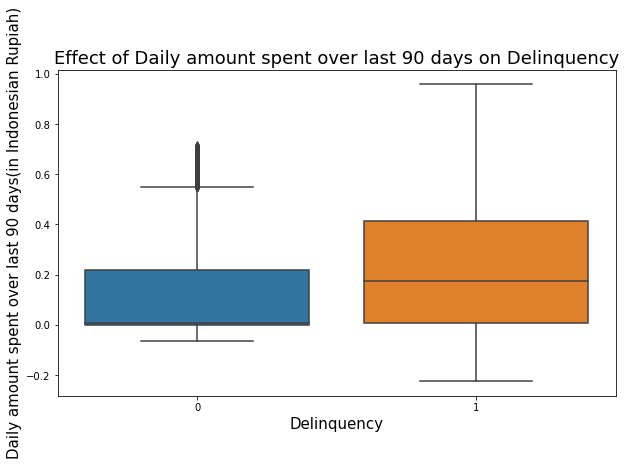

In [120]:
#Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['daily_decr90'])
ax.set_title('Effect of Daily amount spent over last 90 days on Delinquency', fontsize=18)
ax.set_ylabel('Daily amount spent over last 90 days(in Indonesian Rupiah)', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

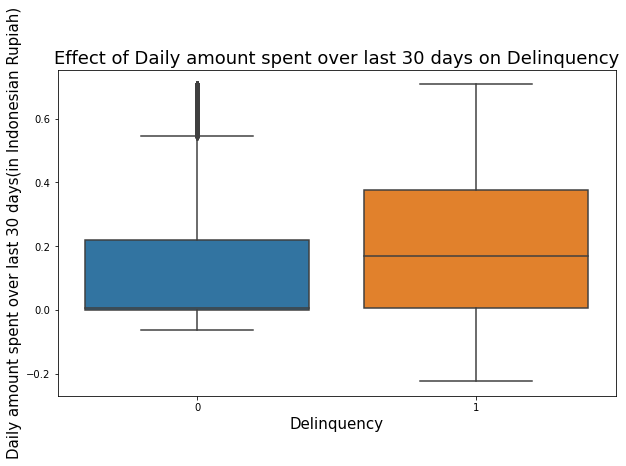

In [121]:
#Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['daily_decr30'])
ax.set_title('Effect of Daily amount spent over last 30 days on Delinquency', fontsize=18)
ax.set_ylabel('Daily amount spent over last 30 days(in Indonesian Rupiah)', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

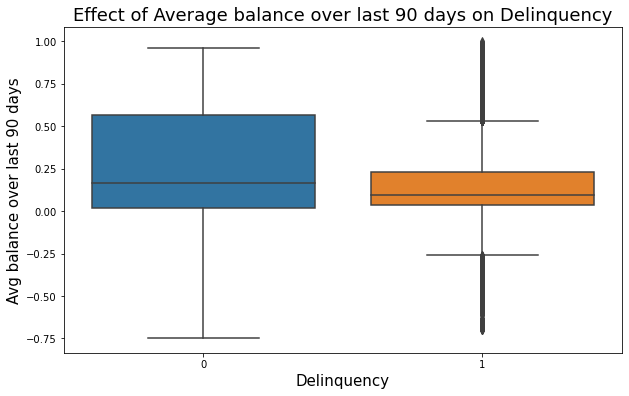

In [122]:
#Average main account balance over last 90 days
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['rental90'])
ax.set_title('Effect of Average balance over last 90 days on Delinquency', fontsize=18)
ax.set_ylabel('Avg balance over last 90 days', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Delinquency')

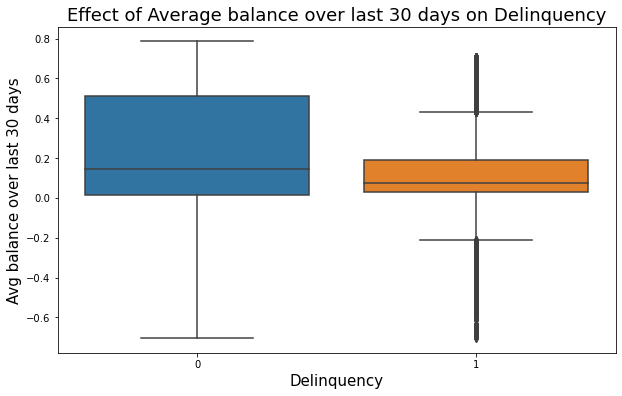

In [123]:
#Average main account balance over last 30 days
plt.figure(figsize=(10,6))
ax = sns.boxplot(y, x['rental30'])
ax.set_title('Effect of Average balance over last 30 days on Delinquency', fontsize=18)
ax.set_ylabel('Avg balance over last 30 days', fontsize = 15)
ax.set_xlabel('Delinquency', fontsize = 15)

In [124]:
#train test split

In [125]:
#create seperate train and test splits for validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 32)
(62878, 32)
(146715,)
(62878,)


In [126]:
#Model selection using various classifiers (Logistic Reg, Random Forest, Decision Tree, Naive Bayes, SVC)

In [127]:
from sklearn.metrics import f1_score,roc_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

In [128]:
def evaluate_model(model):
    model.fit(x_train,y_train)
    prediction_test = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test

In [201]:
#RANDOM FOREST CLASSIFIER
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
Y_RFpred=rf.predict(x_test)
print(classification_report(Y_RFpred,y_test))

Random Forest...
              precision    recall  f1-score   support

           0       0.42      0.76      0.54      4415
           1       0.98      0.92      0.95     58463

    accuracy                           0.91     62878
   macro avg       0.70      0.84      0.75     62878
weighted avg       0.94      0.91      0.92     62878



(2.0, -0.1)

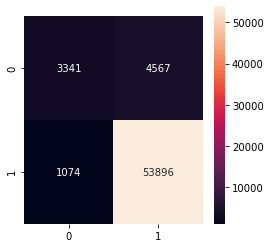

In [202]:
cm_RF = confusion_matrix(y_test, Y_RFpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_RF,annot=True,fmt="d")
ax.set_ylim(2,-0.1)


In [203]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
acc,rocauc,testpred_lr  = evaluate_model(lr)
print('Logistic Regression...')
Y_LRpred=lr.predict(x_test)
print(classification_report(Y_LRpred,y_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression...
              precision    recall  f1-score   support

           0       0.12      0.55      0.19      1662
           1       0.99      0.89      0.93     61216

    accuracy                           0.88     62878
   macro avg       0.55      0.72      0.56     62878
weighted avg       0.96      0.88      0.91     62878



(2.0, -0.1)

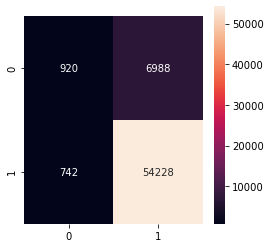

In [204]:
cm_LR = confusion_matrix(y_test, Y_LRpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_LR,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [205]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
acc,rocauc,testpred_dt = evaluate_model(dt)
print('Decision Tree Classifier...')
Y_DTpred=dt.predict(x_test)
print(classification_report(Y_DTpred,y_test))

Decision Tree Classifier...
              precision    recall  f1-score   support

           0       0.49      0.46      0.47      8365
           1       0.92      0.93      0.92     54513

    accuracy                           0.86     62878
   macro avg       0.70      0.69      0.70     62878
weighted avg       0.86      0.86      0.86     62878



(2.0, -0.1)

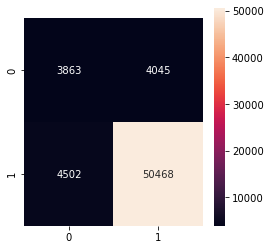

In [206]:
cm_DT = confusion_matrix(y_test, Y_DTpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_DT,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [207]:
#GAUSSIAN NAIVEBAYES
from sklearn.naive_bayes import GaussianNB
gnb =DecisionTreeClassifier()
gnb.fit(x_train,y_train)
acc,rocauc,testpred_gnb = evaluate_model(gnb)
print('Gaussian Navie Bayes...')
Y_GNBpred=gnb.predict(x_test)
print(classification_report(Y_GNBpred,y_test))

Gaussian Navie Bayes...
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      8353
           1       0.92      0.93      0.92     54525

    accuracy                           0.86     62878
   macro avg       0.70      0.69      0.70     62878
weighted avg       0.86      0.86      0.86     62878



(2.0, -0.1)

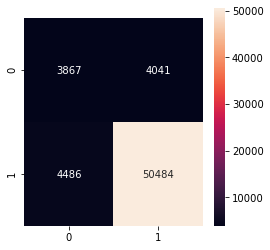

In [208]:
cm_GNB = confusion_matrix(y_test, Y_GNBpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_GNB,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [209]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svc =DecisionTreeClassifier()
svc.fit(x_train,y_train)
acc,rocauc,testpred_svc = evaluate_model(svc)
print('Support vector classifier...')
Y_SVCpred=svc.predict(x_test)
print(classification_report(Y_SVCpred,y_test))

Support vector classifier...
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      8381
           1       0.92      0.93      0.92     54497

    accuracy                           0.86     62878
   macro avg       0.70      0.69      0.70     62878
weighted avg       0.86      0.86      0.86     62878



(2.0, -0.1)

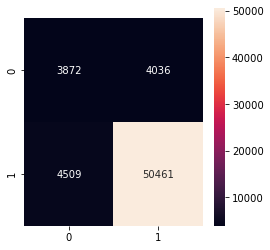

In [210]:
cm_SVC = confusion_matrix(y_test, Y_SVCpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_SVC,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

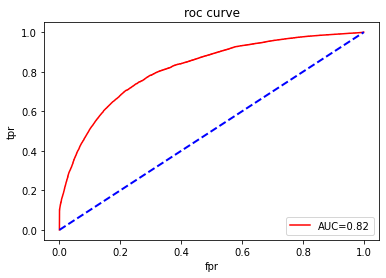

In [211]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=lr.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

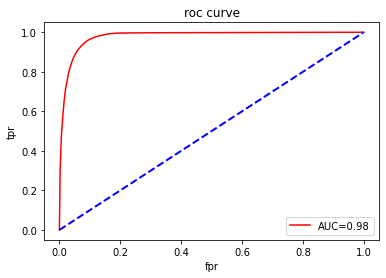

In [212]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=rf.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

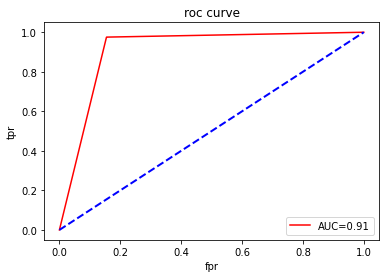

In [213]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=dt.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

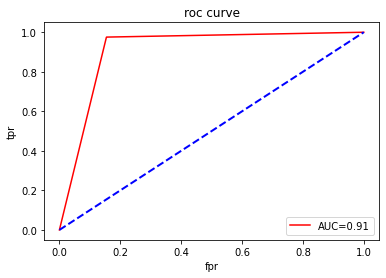

In [214]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=gnb.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

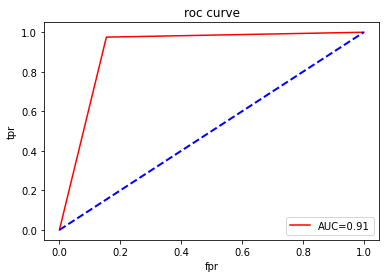

In [215]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=svc.predict_proba(x)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [216]:
# Predicted values
y_head_lr = lr.predict(x_test)
y_head_dt = dt.predict(x_test)
y_head_svc = svc.predict(x_test)
y_head_gnb = gnb.predict(x_test)
y_head_rf = rf.predict(x_test)

In [217]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dt = confusion_matrix(y_test,y_head_dt)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_gnb = confusion_matrix(y_test,y_head_gnb)

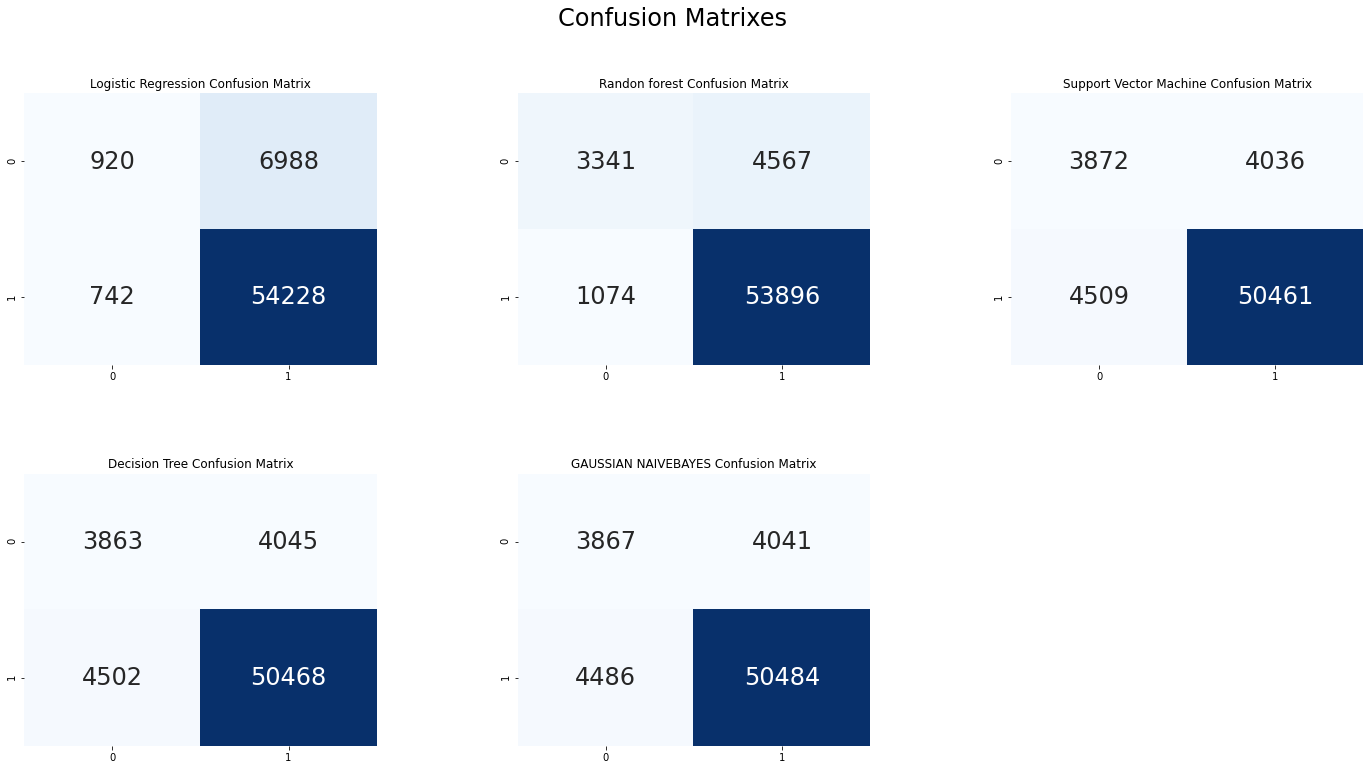

In [218]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Randon forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("GAUSSIAN NAIVEBAYES Confusion Matrix")
sns.heatmap(cm_gnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()